In [1]:
# Импорт необходимых пакетов

# Анализ данных
import pandas as pd
import numpy as np

# Графики
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
# Работа с файлами
import os
import glob

year_path_to_ML_folder = "/Users/iakubovskii/Machine_Learning/RANEPA/Fintech_2020/Машинное обучение/"
os.chdir(year_path_to_ML_folder + "Данные")

# Отключаем предупреждения юпитера
import warnings
warnings.filterwarnings("ignore")

# 1. Линейная регрессия в науке о данных

Основная цель любого аналитика - приблизиться к понимаю взаимосвязей между исследуемыми величинами. Например, найти зависимость между затратами на рекламу и продажами товара (рисунок ниже). 

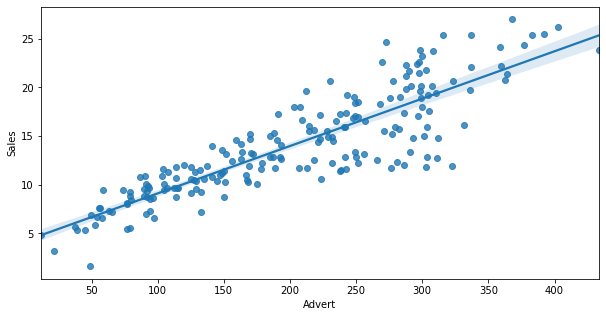

In [2]:
advert = pd.read_csv("Advertising.csv")
advert['Advert'] = advert.drop("Sales", axis=1).sum(axis=1)
sns.regplot(data = advert, x = "Advert", y = "Sales");

На рисунке выше изображена диаграмма рассеивания, где по оси абсцисс затраты на рекламу (тыс. долл.), а по оси ординат - продажи (тыс. единиц товара). Чем более вытянуто облако точек по диагонали, тем более тесная линейная взаимосвязь наблюдается между переменными. Если же облако точек выглядит горизонтально или вертикально, то это свидетельствует об отсутсвии связи между переменными.

Линия, которая проходит сквозь данное облако точек характеризует линейную взаимосвязь между переменными. Переменная *Sales* в нашем случае является зависимой (объясняемой), а *Advert* - зависящей (объясняющей).

**Линейная взаимосвязь** (по параметру) - взаимосвязь в случае, когда факторы в модели с оцененными для них коэффициентами составляют линеную комбинацию:

$$ y = w_1*x_1 + w_2*x_2 + ... + w_p*x_p$$.

**Нелинейная взаимосвязь** (по параметру) - любая зависимость, отличная от линейной комбинации. Например, такая:

$$ y = w_1*x_1 + \frac{w_2*x_2}{w_3 + x_2} $$

**Нелинейная взаимосвязь** (между переменными) - взаимосвязь между переменными в линейной регрессии, где объясняющая переменная принимает нелинейную форму. Например, зависимость заработной платы от возраста в большинстве случаев будет иметь нелинейный вид:

$$ wage = w_0 + w_1*age + w_2 * age^2 $$

Нелинейную взаимосвязь между переменными стоит отличать от нелинейных оценок по параметру. Если в первом случае, мы загоняем в модель нелинейные факторы, то во втором - нелинейные параметры.

Линейные модели позволяют получить ответы на следующие вопросы:

- Есть ли взаимосвязь между переменными?

- Насколько эта взаимосвязь сильная?

- Какие факторы вносят наибольший вклад в изменение зависимой переменной?

- Насколько точны наши оценки влияния факторов?

- Насколько точны наши прогнозы?

- Характер влияния: линейный или нелинейный?

- Насколько сильно взаимосвязь между каким-то фактором и объясняемой переменной зависит от остальных факторов?

## 1.1 Оценка коэффициентов в линейной регрессии

Давайте рассмотрим случай простой парной регрессии для наших рекламных данных. Общий вид для данной регрессии имеет вид (символ $i$ обозначает номер наблюдения):

$$ Sales_i = \beta_0 + \beta_1 Advert_i + \epsilon_i$$

$\epsilon$ здесь означает ошибку регрессии, в которую входят все прочие факторы (для можем и не можем собрать данные), которые не включены в нашу модель. Для того, чтобы численно получить оценки для константы ($\beta_0$) и коэффициента наклона ($\beta_1$), в самом простом случае применяется *МНК* - метод наименьших квадратов, суть которого сводится к минимизации суммы квадратов ошибок по каждому наблюдению $i$:

$$ \sum_i\epsilon_i^2  \implies \underset{\beta_0, \beta_1} min$$

Алгебраически решение данной задачи приводит к следующим оценкам коэффициентов:

$$ \beta_1 = \frac{\sum_{i=1}^N (Advert_i - \bar{Advert})(Sales_i - \bar{Sales})}
{\sum_{i=1}^N (Advert_i - \bar{Advert})} $$

$$ \beta_0 = \bar{Sales} - \beta_1 * \bar{Advert} $$

Подстановка данных формул для наших данных дает следующие результаты для оценок коэффициентов.

In [3]:
advert[['Sales', "Advert"]].cov().values[0,1] / advert['Advert'].var()

0.0486878793190482

In [4]:
beta1 = advert[['Sales', "Advert"]].cov().values[0,1] / advert['Advert'].var() # ковариация делить на дисперсию
beta0 = advert['Sales'].mean() - beta1 * advert['Advert'].mean()
print(f"beta1 = {beta1}, beta0 = {beta0}")

beta1 = 0.0486878793190482, beta0 = 4.2430282160363255


Проверим результат при помощи статистического пакета `statsmodels`

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
print(smf.ols("Sales ~ Advert", data = advert).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.06e-62
Time:                        09:50:04   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2430      0.439      9.676      0.0

Данный протокол оценивания показывает результаты парной регрессии с константой. Видим, что константа и коэффициент наклона при переменной *Advert* совпадают с тем, что мы посчитали выше.

In [6]:
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Advert'], dtype='object')

Парная регрессия нам можем дать ответ о влиянии суммарного рекламного бюджета на продажи товара. Однако, интересней будет посмотреть влияние каждого медиаканала в отдельности. В этом случае нам нужно построить множественную линейную регрессию (парная линейная регрессия является частным случаем множественной). Вид нашей линейной функции теперь следующий:

$$ Sales_i = \beta_0 + \beta_1TV_i + \beta_2Radio_i + \beta_3Newspaper_i + \epsilon_i$$

Универсальная формула для получения оценок коэффициентов $\beta_i$ выводится из условия минимизации суммы квадратов ошибки. Обозначим $Sales_i = y$, наблюдения по рекламным переменнным за $X$,  вектор параметров за $\beta$, а вектор ошибок за $\epsilon$. Тогда, минимизация суммы квадратов отклонений выглядит следующим образом:

$$ \sum_i\epsilon_i^2 = (y - \beta X)^2 = (y - \beta X)^T(y - \beta X) \implies \underset{\beta} min $$

Решая данную оптимизационную задачу относительно $\beta$ мы получаем формулу, которую никто из вас не должен забыть никогда:

$$ \hat{\beta} = (X^TX)^{-1}X^Ty $$

Давайте проверим, действительно ли это так на наших данных по рекламе.

In [7]:
X = advert[['TV', "Radio", "Newspaper"]].values
y = advert['Sales'].values
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([0.05379188, 0.22222731, 0.01681639])

In [8]:
print(sm.OLS(y, X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                   2.43e-171
Time:                        09:50:04   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Внимательный читатель заметит отличие оценивания предыдущей регрессии от парной. Помимо того, что мы включили больше переменных, мы еще и забыли включить константу! Модель с константой фактически означает, что в наше уравнение регрессии будет включаться переменная, тождественная равна единице, т.е. состоящая из вектора единиц. Повторим наши вычисления для множественной регрессии с константой.

In [9]:
new_X = np.hstack([np.ones(X.shape[0]).reshape(-1,1), X])
beta_with_constant = np.linalg.inv(new_X.T @ new_X) @ new_X.T @ y
beta_with_constant

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [10]:
print(sm.OLS(y, sm.add_constant(X)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        09:50:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Отметим важное свойство оценок в множественной линейной регрессии. Коэффициенты в данном случае показывают влияние объясняющего фактора на зависимую переменную, очищенное от влияние всех остальных переменных! Почему это так, читайте подробно здесь:
http://bdemeshev.github.io/em301/notes_2016/frish-and-co.html

## 1.2 Условия Гаусса-Маркова

К сожалению, одной лишь оценкой коэффициентов наша линейная регрессионная модель не ограничивается. Поскольку любая наша модель позволяет сделать вывод о генеральной совокупности данных при помощи выборки, истинное значение коэффициента регрессии может отличаться от того, что мы получили при помощи МНК.

Приведенные выше формулы позволяют нам получить несмещенные, состоятельные и эффективные оценки только лишь при соблюдении условий Гаусса-Маркова:

1. Математическое ожидание ошибки равно нулю: $E(\epsilon)=0$

2. Ошибки имеют постоянную дисперсию (отсутствие гетероскедастичности): $Var(\epsilon) = \sigma^2$

3. Ошибки не коррелируют друг с другом (отсутсвие автокорреляции): $Corr(\epsilon_i, \epsilon_j)=0$

4. Экзогенные переменные не имеют совершенной линейной зависимости: $det(X^TX) \neq 0$ 

5. Все объясняющие переменные детерменированы и действительно являются экзогенными по отношению к эндогенной переменной: $Cov(x,\epsilon)=0$

Если все условия Гаусса-Маркова выполнены, то оценки МНК являются BLUE (best linear unbiased estimators) - наилучшие несмещенные линейные оценки).

## 1.3 Нелинейность, интерпретация коэффициентов, проверка гипотез

Как было сказано в 1.1., помимо линейных взаимосвязей, имеет место быть и нелинейный характер зависимости между переменными. При помощи МНК напрямую получить оценки коэффициентов для таких моделей мы не можем. Однако, нам ничего не мешает в данном случае перейти обратно к линейным моделям. 
Ниже приведем основные виды нелинейных взаимосвязей, переходы и интерпретацию коэффициентов:

| Вид модели | Пример случае парной регрессии | Трансформация | Интерпретация | 
| ---------- | --------------------------------------- | ------------- | ------------- |
| lin-lin    |  $y_i = \beta_0 + \beta_1x_i$ | нет | изменение  на 1 ед. ведет к изменению на $\beta_1$ единиц |
| log-lin    |  $y_i =  \exp^{\beta_0 + \beta_1x_i}$ | $log(y_i) =  \beta_0 + \beta_1x_i$ | изменение  на 1 ед. ведет к изменению на $\beta_1 * 100$ процентов|
| lin-log    |  $\exp^{y_i} =  \beta_0 + \beta_1x_i$ | $y_i =  \beta_0 + log(\beta_1x_i)$ | изменение  на 1% ведет к изменению на $\beta_1 / 100$ единиц|
| log-log    |  $y_i =  \beta_0*x_i^{\beta_1}$ | $log(y_i) =  \beta_0 + log(\beta_1x_i)$ | изменение  на 1% ведет к изменению на $\beta_1$ % |


Поскольку оценивание любой модели нас лишь приближает к поиску истинного значения исследумых параметров, необходимо измерить, а на сколько точно наша оценка близка к своему истинному значению. Здесь на помощь приходят стандартные ошибки коэффициентов регрессии:

$$ s.e.(\beta) = \sqrt{(X^TX)^{-1}\frac{RSS}{n-p}}$$

$RSS = \sum_i(y_i - \hat{y})^2 = \sum_ie_i^2$ - сумма квадратов остатков (чем она меньше, тем лучше мы подобрали факторы для объяснения вариации зависимой переменной. Другая запись: $RSS = e^Te$

In [11]:
resids = y - new_X @ beta_with_constant
RSS = resids.T @ resids
var = np.linalg.inv(new_X.T @ new_X) * \
    (RSS / (new_X.shape[0] - new_X.shape[1]))
np.diag(np.sqrt(var))

array([0.31190824, 0.0013949 , 0.00861123, 0.00587101])

Стандартные ошибки регрессии помимо того, что служат нам неким ориентиром приближения нашей оценки к истинному значения параметра, помогают нам проверять гипотезы об истинном значении коэффициентов регрессии. Как мы выяснили, само по себе вычисление коэффициентов регрессии не может дать нам в полной мере уверенности в том, что такая взаимосвязь будет действительно иметь место в реальности. Для того, чтобы сделать более детальные выводы относительно истинного значения коэффициента, используются доверительные интервалы и проверка гипотез.

Одна из основных гипотез относительно коэффициентов МНК - являются ли они статистически значимо отличны от нуля. Под статистической значимостью подразумевается наше заключение о параметрах генеральной совокупности, исходя из анализа собранных нами выборок.

Схема проверки следующая. 

1. Формируем нулевую гипотезу:  $H_0: \beta_1 = 0$ - истинное значение коэффициента равно 0.

2. Формируем альтернативную гипотезу: 

 - двусторонняя: $H_a: \beta_1 \neq 0$ - мы предполагаем, что истинное значение параметра могут быть как больше, так и меньше нуля.
 - левосторонняя: $H_a: \beta_1 < 0$ - мы предполагаем, что истинное значение параметра может быть меньше нуля.
 - правосторонняя: $H_a: \beta_1 > 0$ - мы предполагаем, что истинное значения параметра может быть больше нуля.

3. Вычисляем статистику теста. В случае проверки гипотез о коэффициентах регрессии статистика теста вычисляется следующим образом:

$$t_{stat} = \frac{\hat{\beta_1} - \beta_1(H_0)}{s.e.(\hat{\beta_1})} = \frac{\hat{\beta_1}}{s.e.(\hat{\beta_1})}$$

Данная статистика при выполнении условий Гаусса-Маркова имеет $t$ - распределение Стьюдента со степенями свободы $n-p$

4. Сравниваем данную статистику с критическим значением на выбранном зараннее уровне значимости (обычно 1%, 5%, 10%). Если статистика теста попадает в область отвержения нулевой гипотезы (находится за пределами $\alpha$ процентного квантиля, то мы делаем вывод об отвержении нулевой гипотезы в пользу альтернативной (у нас достаточно оснований, чтобы отвергнуть нулевую гипотезу).

Другим методом проверки на статистическую значимость коэффициента выступает метод построения доверительных интервалов. Используя зараннее выбранный уровень доверия (1 - уровень значимости) мы можем построить доверительный интервал, который накрывает истинное значение исследуемого параметра при заданном уровне доверия. 

Доверительный интервал для $\beta_1$:

$$ (\hat{\beta_1} - s.e.(\hat{\beta_1})t_{\alpha, n-p};
(\hat{\beta_1} + s.e.(\hat{\beta_1})t_{\alpha, n-p}$$, 
где $t_{\alpha, n-p}$ - $\alpha$ - квантиль распределения Стьюдента со степенями свободы $n-p$

Вообще говоря, для того, чтобы сделать вывод в пользу той или иной гипотезы, нам достаточно посмотреть на значение p-value (probability value), которое по сути своей заменяет сравнение статистики теста с критическим значением на заданном уровне значимости. p-value показывает вероятность того, насколько мы далеки от центра распределения статистики. Чем выше p-value, тем ближе наша статистика находится к центру (иллюстрация ниже).

![](https://blog.minitab.com/hubfs/Imported_Blog_Media/p_value.png)

In [12]:
print(sm.OLS(advert['Sales'], sm.add_constant(advert[['TV', "Radio", "Newspaper"]])).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        09:50:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [13]:
advert[['TV', "Radio", "Newspaper"]].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


В нашей модели все переменные значимо отличны от нуля на 1% уровне значимости, кроме затрат на рекламу в прессе. Интерпретация коэффициентов следующая: рост рекламных расходов на 1 доллар (очищенное от влияния других переменных) приводит к росту выручки на:

- 0.04 единиц в случае ТВ-рекламы

- 0.18 единиц в случае Радио рекламы

- 0 единиц (статистически незначимое влияние) в случае рекламы в Прессе

## 1.4 Дамми-переменные

Среди факторов, включаемых в модель, есть как количественные переменные (обычно принимают несчетное количество значений), так и качественные (принимающие ограниченно количество возможных значений). 

Рассмотрим датасет *Credit*. 

In [14]:
credit = pd.read_csv("Credit.csv")
credit.nunique()

ID           400
Income       399
Limit        387
Rating       283
Cards          9
Age           68
Education     16
Gender         2
Student        2
Married        2
Ethnicity      3
Balance      284
dtype: int64

Как видим, переменные *Gender*, *Student* и *Married** принимают всего два уникальных значения. Данные переменные характеризуют пол заемщика, является ли он студентом или замужем. Давайте прогоним регрессию с такими переменными. В качестве зависимой переменной будет баланс кредитных карт на конец месяца *Balance*. Предварительно заменим текстовые значения на 1 и 0.

In [15]:
# Удалим лишние пробелы по бокам в столбцах 
for obj_var in credit.select_dtypes("object"):
    credit[obj_var] = credit[obj_var].str.strip()
# Заменим на логический тип    
credit = credit.replace(
    {
    "Male": 1, "Female": 0,
    "Yes": 1, "No": 0
    })

In [16]:
print(sm.OLS(credit['Balance'], 
             sm.add_constant(credit[['Gender', "Student", "Married"]])).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     9.531
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           4.32e-06
Time:                        09:50:04   Log-Likelihood:                -3005.4
No. Observations:                 400   AIC:                             6019.
Df Residuals:                     396   BIC:                             6035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        475.1499     43.332     10.965      0.0

Для качественных переменных стандартные ошибки расcчитываются аналогично. Единственное отличие - меняется интерпретация. Например, в нашем случае в среднем баланс кредитных карт у мужчин на 6 долларов выше, чем в женщин. Женатые/замужние клиенты банка имеют в среднем на 13 долларов больше, а студенты в среднем - на 397 долларов больше. 

Но как быть, когда количество возможных вариантов качественной переменной больше двух? Как правило, в таком случае применяют One-Hot кодирование, когда создают ровно столько переменных, сколько уникальных значений качественного признака (на самом деле на одно меньше). Проделаем такое с переменной *Ethnicity*.

In [17]:
Ethnicity_cols = pd.get_dummies(credit['Ethnicity'], drop_first=True)
credit = credit.join(Ethnicity_cols)

Обратим внимание на вторую заметку: 
The smallest eigenvalue is 7.47e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

Это результат того, что мы включили в модель константу. Из-за этого, у нас в данных совершенная линейная зависимость между факторами. Вспоминаем, что константа - это вектор, состоящий из единиц. Таким образом, любая строчка нашей матрицы объясняющих переменных дает нам в сумме единицу, что сигнализирует о строгой линейной связи.

In [18]:
X_dummy_trap = np.hstack([np.ones(Ethnicity_cols.shape[0]).reshape(-1,1),
                          Ethnicity_cols.values])
try:
    np.linalg.inv(X_dummy_trap.T @ X_dummy_trap) @ X_dummy_trap.T @ credit['Balance'].values
except Exception as e:
    print(e)

LinAlgError: Singular matrix

## 1.5 Потенциальные проблемы в линейной регрессии и возможные решения

Среди потенциальных проблем, с которыми обычно сталкиваются исследователи при построении линейных моделей можно выделить следующие:

1. Нелинейный характер взаимосвязи

2. Автокорреляция

3. Гетероскедастичность

4. Выбросы

5.  Наблюдения с высокой разбалансировкой

6. Мультиколлинерность.

### 1.5.1 Нелинейность

Когда мы оцениваем линейную взаимосвязь между переменными в то время когда истинная зависимость нелинейная, наши выводы относительно коэффициентов модели являются неверными. Один из способов убедиться в том, что линейная взаимосвязь неверно истолковывает данные - это посмотреть на график остатков против подобранных значений $\hat{y}$.

In [19]:
auto = pd.read_csv("Auto.csv")
auto['horsepower_square'] = auto['horsepower'] ** 2

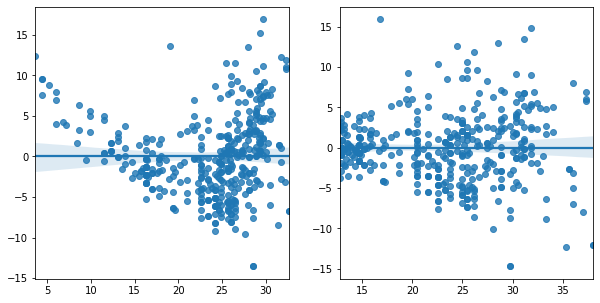

In [20]:
auto_fit_linear = sm.OLS(auto['mpg'], 
                         sm.add_constant(auto['horsepower'])
                        ).fit()
auto_fit_non_linear = sm.OLS(auto['mpg'], 
                         sm.add_constant(auto[['horsepower', 'horsepower_square']])
                        ).fit()
plot_linear_data = pd.DataFrame(np.vstack([auto_fit_linear.resid.values,
                                          auto_fit_linear.fittedvalues.values]).
                                                                  reshape(-1,2),
                                         columns = ['resid', 'fitted'])
fig, axs = plt.subplots(ncols = 2)
sns.regplot(y = auto_fit_linear.resid, x = auto_fit_linear.fittedvalues,
           ax = axs[0]);
sns.regplot(y = auto_fit_non_linear.resid, x = auto_fit_non_linear.fittedvalues,
           ax = axs[1]);

Еще один способ посмотреть на график остатков (уже против объясняющей переменной).

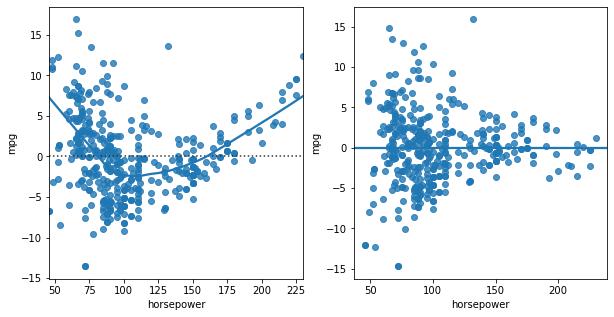

In [21]:
fig, axs = plt.subplots(ncols=2)
sns.residplot(x = 'horsepower', y = 'mpg', 
              data = auto, lowess = True, order=1, ax=axs[0]);
sns.residplot(x = 'horsepower', y = 'mpg', 
              data = auto, lowess = True, order=2, ax=axs[1]);

In [22]:
print(sm.OLS(auto['mpg'], 
                         sm.add_constant(auto[['horsepower', 'horsepower_square']])
                        ).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.40e-99
Time:                        09:50:05   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                56.9001      1.80

В конечном счете, видим, что перед нами квадратичная зависимость. В нашем случае - это парабола с ветвями вверх (коэффициент перед квадратичным членом положительный).

### 1.5.2 Автокорреляция

Автокорреляция предполагает наличие связи между остатками в модели регрессии. Почему это плохо? Потому что в этом случае стандартные ошибки в модели будут являться недооцененными, что исказит наши результаты (получаем значимость коэффициентов, когда на самом деле они не значимы).

Зачастую автокорреляция проявляется в случае регрессии временных рядов, когда мы собираем наблюдения в различные моменты времени. 

Однако, автокорреляция может свидетельствовать также и о пропуске важных переменных. Например, мы хотим предсказывать рост респондентов по их весу. Корреляция между остатками может быть вызвана тем, что респонденты из одной семьи, либо употребляют одну и ту же диету. Другими словами, данные респонденты обладают неким общим свойством, которое может быть как оценено количественно, так и не оценено. 

Посмотрим график остатков в случае различных линейных моделей.


Correlation between resid and lag1 resid: 
 advert = -0.04709189714421426 auto = 0.5397905087253321


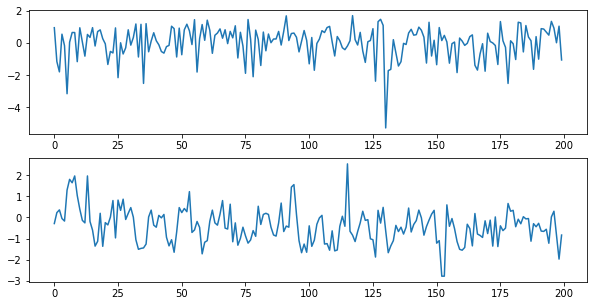

In [23]:
advert_model = sm.OLS(advert['Sales'], 
                      sm.add_constant(advert[['TV', "Radio", "Newspaper"]])).fit()
# Стандартизируем остатки (для того, чтобы было корректно их сравнивать)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
advert_resid = sc.fit_transform(advert_model.resid.values.reshape(-1,1))
auto_resid = sc.fit_transform(auto_fit_linear.resid.values.reshape(-1,1))

fig, axs = plt.subplots(nrows = 2)
pd.Series(advert_resid.reshape(-1)).plot(ax = axs[0]);
pd.Series(auto_resid.reshape(-1)).iloc[:200].plot(ax = axs[1]);
print("Correlation between resid and lag1 resid: \n",
      f"advert = {pd.Series(advert_resid.reshape(-1)).corr(pd.Series(advert_resid.reshape(-1)).shift(1))}",
      f"auto = {pd.Series(auto_resid.reshape(-1)).corr(pd.Series(auto_resid.reshape(-1)).shift(1))}")

Как видно из графиков, автокорреляция наблюдается в случае линейной модели влияния *horse* на *mpg*.

### 1.5.3 Гетероскедастичность

Гетероскедастичность (неоднородность) остатков проявляется, как правило, в кросс-секционных (в один момент времени) выборках. Нарушение условия постоянства дисперсии (гомоскедастичность) приводит к тому, что статистика вида $\frac{\hat{\theta}}{s.e(\hat{\theta})}$ больше не имеет распределение Стьюдента. Соответственно, строить доверительные интервалы и проверять гипотезы классических способов нельзя с научной точки зрения. 

Одним из наиболее простых решений по борьбе с гетероскедастичностью является логарифмирование переменных. Рисунок ниже иллюстрирует вышесказанное.

дисперсия остатков первых 200 наблюдений с линейной зависимой переменной: 
 11.57456133008462 дисперсия остатков последних 200 наблюдений с линейной зависимой переменной: 
 17.97892897324328
дисперсия остатков последних 200 наблюдений с линейной зависимой переменной: 
 0.023565130572859784 дисперсия остатков последних 200 наблюдений с логарифмической зависимой переменной: 
 0.0246947303461133


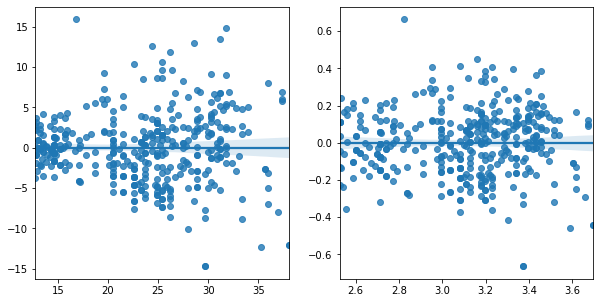

In [24]:
auto_fit_non_linear_non_log = sm.OLS(auto['mpg'], 
                         sm.add_constant(auto[['horsepower', 'horsepower_square']])
                        ).fit()
auto_fit_non_linear_log = sm.OLS(np.log(auto['mpg']), 
                         sm.add_constant(auto[['horsepower', 'horsepower_square']])
                        ).fit()

fig, axs = plt.subplots(ncols = 2)
sns.regplot(y = auto_fit_non_linear_non_log.resid, 
            x = auto_fit_non_linear_non_log.fittedvalues,
           ax = axs[0]);
sns.regplot(y = auto_fit_non_linear_log.resid, 
            x = auto_fit_non_linear_log.fittedvalues,
           ax = axs[1]);
print(
     f"дисперсия остатков первых 200 наблюдений с линейной зависимой переменной: \n",
     f"{np.var(auto_fit_non_linear_non_log.resid.iloc[:200])}",
     f"дисперсия остатков последних 200 наблюдений с линейной зависимой переменной: \n",
     f"{np.var(auto_fit_non_linear_non_log.resid.iloc[200:])}",
     )
print(
     f"дисперсия остатков последних 200 наблюдений с линейной зависимой переменной: \n",
     f"{np.var(auto_fit_non_linear_log.resid.iloc[:200])}",
     f"дисперсия остатков последних 200 наблюдений с логарифмической зависимой переменной: \n",
     f"{np.var(auto_fit_non_linear_log.resid.iloc[200:])}",
     )

### 1.5.4 Выбросы (ураганные значения)

Выбросами являются, как правило, те наблюдения, которые очень сильно выбиваются из основной массы. Из-за присутствия таких наблюдений в выборке, результаты регрессии могут существенно отклониться от истинной зависимости. Как таковых четких правил для определения ураганнных значений нет. Однако, на практике применяется такой подход. Оценивается модель и полученные остатки приводят к стандартизированному виду (распределение с нулевым средним и единичным стандартным отклонением). Тогда удаляются все те наблюдения, для которых остатки принимают значения за пределами интервала [-3;3].

In [25]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'horsepower_square'],
      dtype='object')

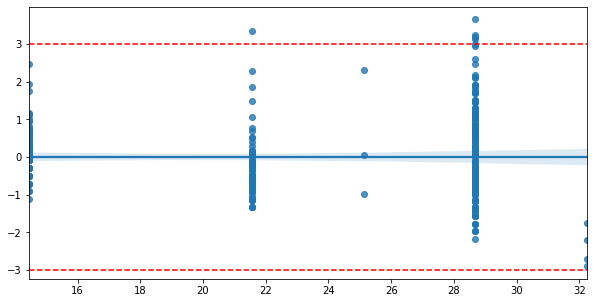

In [26]:
mpg_cyl = smf.ols("mpg ~ cylinders", 
                data = auto).fit()
stand_resid = sc.fit_transform(mpg_cyl.resid.values.reshape(-1,1))
mpg_cyl_fit = mpg_cyl.fittedvalues
g = sns.regplot(x = mpg_cyl_fit, y = stand_resid);
g.axhline(-3, ls='--', color = "red")
g.axhline(3, ls='--', color = "red")

### 1.5.5 Наблюдения с высокой разбалансировкой

В то время как выбросы - это выделяющиеся наблюдения $y_i$ при фиксированных значениях $x_i$, наблюдения с высокой разбалансировкой относятся к нерегулярным значениям $x_i$. Для их выявления используется формула:

$$ h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{i'=1}^N(x_{i'} - \bar{x})^2 } $$

### 1.5.6 Мультиколлинеарность

Включение в модель признаков, которые сильно связаны друг с другом (коэффициент корреляции близок к 1)  может повлечь за собой ряд проблем:

- Статистически незначимые коэффициенты при значимости регрессии в целом

- Сильное изменение оценок коэффициентов при добавлении или удалении переменных


Наличие мультиколлинеарности можно проверить:

- Корреляционной матрицей (как правило, перед началом анализа)

- VIF (Variance inflation factor)

In [27]:
X_reg_credit_all = pd.get_dummies(credit.drop(['ID', "Balance", "Ethnicity"], axis=1),
                                 drop_first = True)
X_reg_credit_all.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Asian,Caucasian
0,14.891,3606,283,2,34,11,1,0,1,0,1
1,106.025,6645,483,3,82,15,0,1,1,1,0
2,104.593,7075,514,4,71,11,1,0,0,1,0
3,148.924,9504,681,3,36,11,0,0,0,1,0
4,55.882,4897,357,2,68,16,1,0,1,0,1


In [28]:
X_a_l = sm.add_constant(X_reg_credit_all)
y_a_l = credit['Balance']
sm.OLS(y_a_l, X_a_l).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          1.11e-253
Time:                        09:50:06   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -489.8611     35.801    -13.683      0.000    -560.250    -419.473
Income        -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit          0.1909      0.033      5.824      0.000       0.126       0.255
Rating         1.1365      0.491      2.315      0.021       0.171       2.102
Cards         17.7245      4.341      4.083      0.000       9.190      26.259
Age           -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education     -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender        10.6532      9.914      1.075      0.283      -8.839      30.145
Student      425.7474     16.723     25.459      0.000     392.869     458.626
Married       -8.5339     10.363     -0.824      0.411     -28.908      11.841
Asian         16.8042     14.119      1.190      0.235     -10.955      44.564
Caucasian     10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
def get_corr_df(X):
    dataCorr = X.corr(method='pearson')
    dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))
    dataCorr = dataCorr.stack().reset_index()
    dataCorr.columns = ['var_1', 'var_2', 'corr']
    dataCorr['corr_abs'] = np.abs(dataCorr['corr'])
    dataCorr.sort_values("corr_abs", ascending=False, inplace=True)
    return dataCorr
get_corr_df(X_reg_credit_all).head()

,var_1,var_2,corr,corr_abs
10,Limit,Rating,0.996880,0.996880
0,Income,Limit,0.792088,0.792088
1,Income,Rating,0.791378,0.791378
54,Asian,Caucasian,-0.582131,0.582131
3,Income,Age,0.175338,0.175338


In [30]:
# VIF
def vif(X):
    """
    X - dataframe with colnames
    """
    return pd.DataFrame(
        dict(zip(X.columns,
         np.diag(np.linalg.inv(X.corr().values)))
    ), index = ["VIF"]
    ).T.reset_index()
vif(X_reg_credit_all)
get_corr_df(X_reg_credit_all).merge(
vif(X_reg_credit_all), left_on = "var_1", right_on = "index").merge(
vif(X_reg_credit_all), left_on = "var_2", right_on = "index",
suffixes = ['_var1', "_var2"]).sort_values("corr_abs", ascending=False).head(10)

,var_1,var_2,corr,corr_abs,index_var1,VIF_var1,index_var2,VIF_var2
0,Limit,Rating,0.996880,0.996880,Limit,234.028100,Rating,235.848259
54,Income,Limit,0.792088,0.792088,Income,2.786182,Limit,234.028100
1,Income,Rating,0.791378,0.791378,Income,2.786182,Rating,235.848259
46,Asian,Caucasian,-0.582131,0.582131,Asian,1.552157,Caucasian,1.527504
3,Income,Age,0.175338,0.175338,Income,2.786182,Age,1.051410
4,Rating,Age,0.103165,0.103165,Rating,235.848259,Age,1.051410
2,Limit,Age,0.100888,0.100888,Limit,234.028100,Age,1.051410
9,Married,Asian,0.088595,0.088595,Married,1.044638,Asian,1.552157
18,Student,Married,-0.076974,0.076974,Student,1.031517,Married,1.044638
19,Age,Married,-0.073136,0.073136,Age,1.051410,Married,1.044638


# 2. Смещение и разброс

Давайте поговорим об ошибках прогноза в линейных моделях (верно и для остальных видов моделей). Для этого введем следующие предположения:

- истинное значение целевой переменной представляет из себя сумму подобранной функции (детерминированной, т.е. неслучайной) $f\left(\textbf{x}\right)$ и случайной ошибки $\epsilon$: $y = f\left(\textbf{x}\right) + \epsilon$;
- ошибки имеют нормальное распределение с нулевым средним и постоянной дисперсией: $\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$;
- соответственно и истинное значение целевой переменной распределенно также нормально: $y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$;
- мы пытаемся аппроксимировать нашу неизвестную функцию $f\left(\textbf{x}\right)$ в предположении ее линейности с выбранными переменными (еще мы любим называть их ковариатами) $\widehat{f}\left(\textbf{x}\right)$, которая, в свою очередь, является точечной оценкой  $f$ в пространстве элементарных функций (в нашем случае - это семейство линейных функций).

Таким образом, ошибка регрессии $\textbf{x}$ раскладывается следующим образом при помощи формулы для дисперсии:
$$\Large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}$$

Давайте проанализируем на каждое слагаемое отдельно. Первые два раскладываются следующим образом: $\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$:

$$\Large \begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}$$

Заметим, что (это как "очевидно" в книгах по матану):

$$\Large \begin{array}{rcl} 
\text{Var}\left(y\right) &=& \mathbb{E}\left[\left(y - \mathbb{E}\left[y\right]\right)^2\right] \\
&=& \mathbb{E}\left[\left(y - f\right)^2\right] \\
&=& \mathbb{E}\left[\left(f + \epsilon - f\right)^2\right] \\
&=& \mathbb{E}\left[\epsilon^2\right] = \sigma^2
\end{array}$$

$$\Large \mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f$$

Вспомним. что ошибка и целевая переменная являются независимыми (потому что мы так предположили!, хех):

$$\Large \begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}$$

Теперь соберем все вместе:

$$\Large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}$$

Последняя формула и показывает то, из чего состоит ошибка модели: $y = f\left(\textbf{x}\right) + \epsilon$ состоит из следующих элементов:

- квадрат смещения: $\text{Bias}\left(\widehat{f}\right)$ средняя ошибка аппроксимации
- разброс: $\text{Var}\left(\widehat{f}\right)$ вариация ошибки, или то, насколько сильно изменяются наши результаты при оценивании одной и той же модели на различных наборах данных
- ошибка, которую нельзя искоренить: $\sigma^2$.

К сожалению мы не можем повлиять на $\sigma^2$, мы можем повлиять на две остальные. В идеале нам бы обнулить эти две ошибки (правая верхняя мишень на картинке ниже). Однако,практика - дело суровое и, как правило, мы балансируем между снижением разброса и смещения.

<div>
<img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToSoHEU5afeAUJJGhKjbmXJNNGsY8CNwve8Q&usqp=CAU width="600"
<div>
    
    

Вообще говоря, при росте сложности модели (например, количества переменных) дисперсия ошибки начинает расти, а смещение снижается. 

Переобучение (высокий разброс) - наша модель черезчур подобрала зависимость под тренировочную выборку и на новых данных качество модели существенно падает.

Недообучение (высокое смещение) - наша модель слишком плохо подобрала истинную зависимость и дает в целом плохой прогноз.

<div>
<img src=https://cdn-images-1.medium.com/max/883/1*8sV6Sr9uc0Ef39YBivLzrw.jpeg width="800">
<div>

# 3. Регуляризация

Теперь мы плавно переходим из светлой стороны эконометрики с ее поиском истинных взаимосвязей между переменными на темную сторону машинного обучения. В машинном обучении, как правило, нас не волнуют истинные взаимосвязи между переменными. Наиболее интересным здесь представляется получение ТОЧНЫХ ПРОГНОЗОВ НА НОВЫХ ДАННЫХ. (снижение разброса вместо снижения смещения).

Давайте представим, что мы находимся где-нибудь в Лондоне в осенний период и собираемся выйти на улицу. Мы думаем, взять с собой зонт или нет, т.е. нас интересует вопрос - пойдет ли дождь сегодня или нет?

Эконометрист при решении данной задачи в первую очередь спросит: а какие факторы и каким образом влияют на то, идет дождь или нет? 


Машин-лернер-биг-датер в первую очередь спросит с какой точностью наша модель предскажет вероятность дождя?

Если мы посмотрим на картнинку с мишенью, то эконометрист будет находиться справа вверху, а специалист по машинному обучению - слева внизу, поскольку основная задача - предсказание при помощи нашей модели на НОВЫХ ДАННЫХ, а не поиск истинных взаимосвязей на СТАРЫХ.

Как мы с вами уже знаем, оценки в линейной регрессии являются несмещенными, а значит, что при выполнении условий Гаусса-Маркова, наши оценки будут с нулевым смещеним. Однако, значит ли это, что мы можем при помощи такой модели без проблем предсказывать целевую переменную на новых данных? Спойлер: нет!

Для того, чтобы наша модель хорошо работала и на новых данных мы обычно жертвуем несмещенностью в пользу снижения дисперсии, т.е. наши прогнозы более точны на новых данных, хоть и модельные значения коэффициентов могут отличаться от истинных взаимосвязей. 

Для достижения данной цели нам помогает регрессия с регуляризацией. 

Очень хорошо описывается в этом [видосике](https://www.youtube.com/watch?v=Q81RR3yKn30)

## 3.1 L2-регуляризация (RIDGE регрессия)

В случае L2-регуляризации мы минимизируем теперь не просто сумму квадратов ошибок, но добавляем еще и некий штраф для коэффициентов модели:

$$ \Large \sum_i( y_i - \beta_{0} - \sum_j\beta_jx_{ij})^2 + \lambda \sum_j\beta_j^2$$

$\lambda$ в данном случае помогает нам корректировать коэффициенты регрессии. При $\lambda = 0$ мы получаем классические МНК-оценки. 

Заметим, что в случае простой парной регрессии с константой, $\sum_j\beta_j^2 = (\beta_0 + \beta_1)^2$. Данное уравнение описывает окружность в точке, где коэффициенты регрессии принимают нулевые значения. Радиус окружности, а следовательно и то, насколько данные коэффициенты далеки от нулевых значения, зависит от суммы квадратов отклонений обоих коэффициентов от нуля. В итоге получаем, что чем больше эта сумма квадратов, тем больше оптимизируемая нами ошибка. Соответственно, при помощи данного регуляризатора мы как бы сдерживаем коэффициенты регрессии в рамках определенного круга значений. Чем больше $\lambda$, тем больше данный фактор сдерживания. Кстати говоря, данный вид регуляризации помогает нам бороться с последствиями мультиколлинеарности - коэффициенты регрессии оцениваются более стабильно и не так сильно изменяются в зависимости от выборки и спецификации модели.

С ростом $\lambda$, мы увеличиваем смещение, но снижаем разброс.

## 3.2 L1-регуляризация (LASSO регрессия)

В случае L1-регуляризации квадрат заменяется на модуль:

$$ \Large \sum_i( y_i - \beta_{0} - \sum_j\beta_jx_{ij})^2 + \lambda \sum_j|\beta_j|$$

Теперь у нас не окружность, а ромб. LASSO регрессия, в отличие от RIDGE, позволяет нам занулить ненужные факторы, включаемые в модель.

## 3.3 Сравнение L1 и L2 регуляризаций


<div>
<img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCMf2i_pt6-Fo_UjM_je659692VubepG6l2g&usqp=CAU width="500">
<div>

In [31]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

$$x_{stand} = \frac{x - mean(x)} {std(x)}$$

In [53]:
# Перед регуляризацией обязательно нужно стандартизировать признаки!
sc = StandardScaler()
X_cred = credit[['Income', "Limit", "Rating", "Student"]] 
X_cred_values = sc.fit_transform(X_cred)
X_cred_values[:, 3] = X_cred['Student'].values
y_cred_values = credit.Balance.values.reshape(-1, 1)
y_cred_values = sc.fit_transform(y_cred_values)

ridge = Ridge(alpha=0) # Чем больше, тем сильней регуляризация.
model_ridge = ridge.fit(X_cred_values, y_cred_values)
print(dict(zip(X_cred.columns, model_ridge.coef_[0, :])))

{'Income': -0.60902107848124, 'Limit': 0.6109014772036733, 'Rating': 0.7371554320926514, 'Student': 0.9204775104355936}


In [54]:
# Давайте посмотрим, как изменяются коэффициенты модели при изменении параметра alpha.
def ridge_coefs(alpha_):
    ridge_ = Ridge(alpha=alpha_)
    model_ridge = ridge_.fit(X_cred_values, y_cred_values)
    coefs = model_ridge.coef_[0, :]
    return coefs
models_different_alpha = list(map(ridge_coefs, np.linspace(0.01, 1000, 20000)))

coefs_df = pd.DataFrame(np.vstack(models_different_alpha),
                                 columns = X_cred.columns)
coefs_df['alpha'] = np.linspace(-2, 10000, 20000)
coefs_df.set_index("alpha").plot();

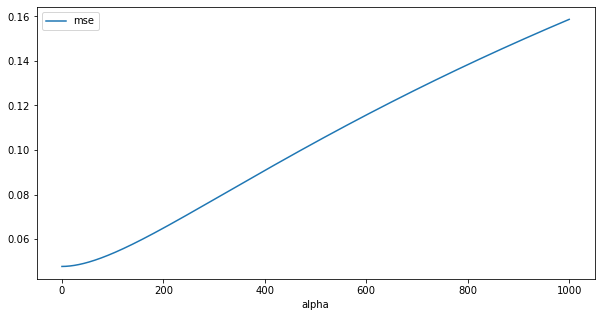

In [56]:
from sklearn.metrics import mean_squared_error
# Теперь посмотрим как изменяется точность модели при изменении параметра alpha.
def ridge_mse(alpha_):
    ridge_ = Ridge(alpha=alpha_)
    model_ridge = ridge_.fit(X_cred_values, y_cred_values)
    y_pred = model_ridge.predict(X_cred_values) 
    mse_in_sample = mean_squared_error(y_cred_values, y_pred)
    return mse_in_sample
mse_in_sample_alpha = list(map(ridge_mse, np.linspace(0.01, 100, 20000)))
mse_df = pd.DataFrame(mse_in_sample_alpha, columns = ['mse'])
mse_df['alpha'] = np.linspace(0.01, 1000, 20000)

mse_df.set_index('alpha').plot();

Видим, что MSE стабильно растет! Но в чем тогда смысл использовать L2-регуляризацию?
Внимательный студент заметит, что MSE мы считаем на тренировочной выборке, тогда как в реальной жизни машин-лернерам-биг-датерам важней смотреть, как наша модель себя ведет на новых данных (тестовых). 
Давайте разобьем нашу выборку на тренировочную (70%) и тестовую (30%).



In [57]:
X_cred_values_train = X_cred_values[:int(X_cred_values.shape[0]*0.7), :]
X_cred_values_test = X_cred_values[int(X_cred_values.shape[0]*0.7):, :]
y_cred_values_train = y_cred_values[:int(y_cred_values.shape[0]*0.7), :]
y_cred_values_test = y_cred_values[int(y_cred_values.shape[0]*0.7):, :]

print(f"Количество наблюдений на тренировочной выборке: {X_cred_values_train.shape[0]} \n",
f"Количество наблюдений на тестовой выборке:{X_cred_values_test.shape[0]}")

np.allclose(280/120, 7/3)

Количество наблюдений на тренировочной выборке: 280 
 Количество наблюдений на тестовой выборке:120


True

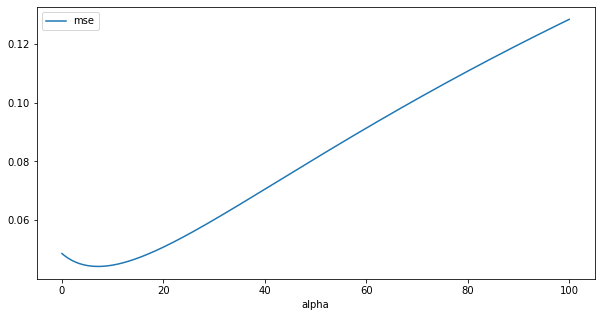

In [61]:
def ridge_mse_test(alpha_):
    ridge_ = Ridge(alpha=alpha_)
    model_ridge = ridge_.fit(X_cred_values_train, y_cred_values_train)
    y_pred = model_ridge.predict(X_cred_values_test) 
    mse_in_sample = mean_squared_error(y_cred_values_test, y_pred)
    return mse_in_sample
mse_out_sample_alpha = list(map(ridge_mse_test, np.linspace(0.01, 100, 2000)))
mse_df = pd.DataFrame(mse_out_sample_alpha, columns = ['mse'])
mse_df['alpha'] = np.linspace(0.01, 100, 2000)

mse_df.set_index('alpha').plot();

Теперь видим, что умеренная регуляризация позволила нам снизить тестовое значение MSE. Однако, при черезчур больших значений $alpha$ ошибка опять улетает в небеса.

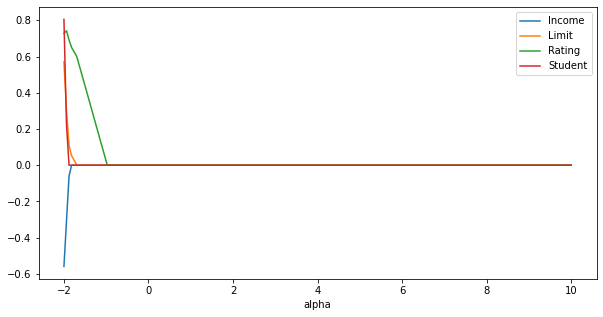

In [59]:
# Давайте посмотрим, как изменяются коэффициенты модели при изменении параметра alpha.
def lasso_coefs(alpha_):
    lasso_ = Lasso(alpha=alpha_)
    model_lasso = lasso_.fit(X_cred_values, y_cred_values)
    coefs = model_lasso.coef_
    return coefs
models_different_alpha_lasso = list(map(lasso_coefs, np.linspace(0.01, 10, 200)))

coefs_df_lasso = pd.DataFrame(np.vstack(models_different_alpha_lasso),
                                 columns = X_cred.columns)
coefs_df_lasso['alpha'] = np.linspace(-2, 10, 200)
coefs_df_lasso.set_index("alpha").plot();

# 4. Практика



In [62]:
from sklearn.datasets import load_boston
print(load_boston().keys())
print(load_boston()['DESCR'])
df = pd.DataFrame(load_boston()['data'], columns = load_boston()['feature_names'])
df['medv'] = load_boston()['target']
df.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [64]:
# Построим регрессию
import statsmodels.formula.api as smf
frml = "medv ~ " + " + ".join(df.drop("medv", axis=1).columns.tolist())
reg_mult = smf.ols(formula = frml, data=df).fit()
print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        10:03:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [65]:
reg_mult.params

Intercept    36.459488
CRIM         -0.108011
ZN            0.046420
INDUS         0.020559
CHAS          2.686734
NOX         -17.766611
RM            3.809865
AGE           0.000692
DIS          -1.475567
RAD           0.306049
TAX          -0.012335
PTRATIO      -0.952747
B             0.009312
LSTAT        -0.524758
dtype: float64

In [67]:
frml = "medv ~ LSTAT * AGE"
reg_mult = smf.ols(formula = frml, data=df).fit()
print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           4.86e-88
Time:                        10:04:24   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [68]:
frml = "medv ~ LSTAT + I(LSTAT**2)"
reg_mult = smf.ols(formula = frml, data=df).fit()
print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          1.56e-112
Time:                        10:04:24   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [69]:
# Можем и корень квадратный включить (но это не очень полезно)
frml = "medv ~ LSTAT + I(np.sqrt(LSTAT)) + I(np.abs(LSTAT))"
reg_mult = smf.ols(formula = frml, data=df).fit()
print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     506.4
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          3.30e-121
Time:                        10:04:24   Log-Likelihood:                -1561.2
No. Observations:                 506   AIC:                             3128.
Df Residuals:                     503   BIC:                             3141.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            68.6836      2.53

In [70]:
# логафрим целевой переменной
frml = "I(np.log(medv)) ~ LSTAT"
reg_mult = smf.ols(formula = frml, data=df).fit()
print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:        I(np.log(medv))   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          2.23e-116
Time:                        10:04:24   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

In [71]:
# Бейсбол
hitters = pd.read_csv('Hitters.csv').dropna()
hitters.set_index("Unnamed: 0", inplace=True)

In [72]:
y, X = hitters['Salary'], hitters.drop("Salary", axis=1).select_dtypes("int")

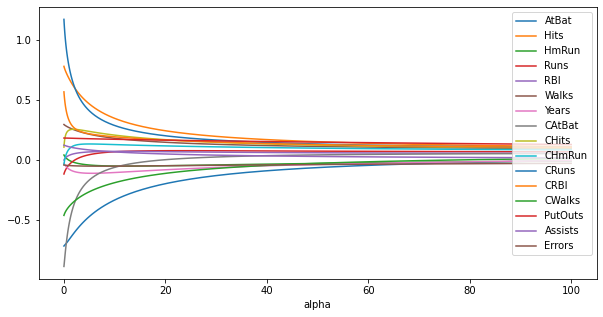

In [74]:
# Давайте посмотрим, как изменяются коэффициенты модели при изменении параметра alpha.
X_scal = sc.fit_transform(X)
y_scal = sc.fit_transform(y.values.reshape(-1,1))
def ridge_coefs(alpha_):
    ridge_ = Ridge(alpha=alpha_)
    model_ridge = ridge_.fit(X_scal, y_scal)
    coefs = model_ridge.coef_[0, :]
    return coefs
grid_alpha = 10**np.linspace(-2, 2, 100)
models_different_alpha = list(map(ridge_coefs, grid_alpha))

coefs_df = pd.DataFrame(np.vstack(models_different_alpha),
                                 columns = X.columns)
coefs_df['alpha'] = grid_alpha
coefs_df.set_index('alpha').plot();

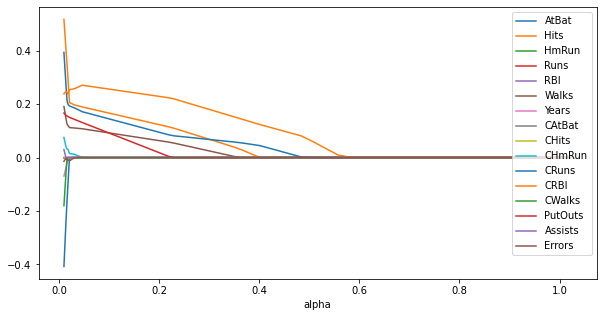

In [79]:
# Давайте посмотрим, как изменяются коэффициенты модели при изменении параметра alpha.
X_scal = sc.fit_transform(X)
y_scal = sc.fit_transform(y.values.reshape(-1,1))
def lasso_coefs(alpha_):
    lasso_ = Lasso(alpha=alpha_)
    model_lasso = lasso_.fit(X_scal, y_scal)
    coefs = model_lasso.coef_
    return coefs
grid_alpha = 10**np.linspace(-2, 0.01, 100)
models_different_alpha = list(map(lasso_coefs, grid_alpha))

coefs_df = pd.DataFrame(np.vstack(models_different_alpha),
                                 columns = X.columns)
coefs_df['alpha'] = grid_alpha
coefs_df.set_index('alpha').plot();